In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1: Add a column for GDP per Capita

#GDP per Capita = GDP divided by Population
#The following code adds the 'GDP per Capita' metric as a new column in the dfLE dataframe, and shows 10 random rows of GDP per Capita. 
dfLE['GDP per Capita'] = dfLE['GDP']/dfLE['Population']
dfLE[['GDP per Capita']].sample(10)


,GDP per Capita
151,256.516755
33,5677.906861
119,NaN
74,8020.910601
9,3091.580405
103,571.797607
175,3331.124773
62,NaN
14,4234.608591
95,245.406059


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

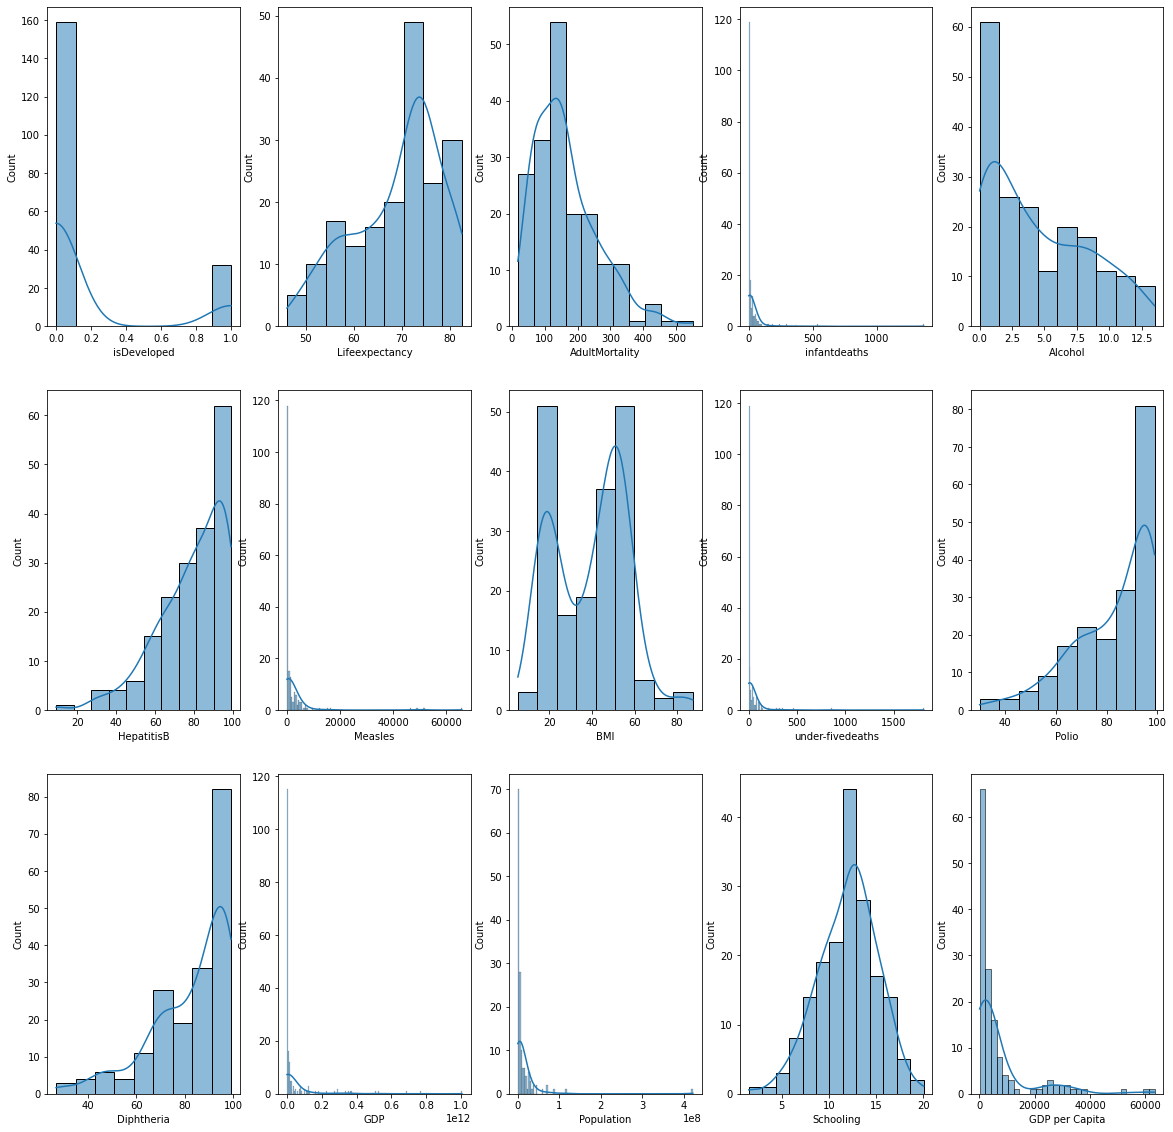

In [4]:
#Part 2: Print all distributions (Density distributions)

#Since 'Country' does not contain floating data, a distribution plot cannot be plotted for 'Country', so I created a new dataframe without 'Country', called dfLE2. 
dfLE2 = dfLE.drop(columns={"Country"})

#Scaling the grid of plots so it is bigger and easier to visualize. 
plt.rcParams["figure.figsize"] = (20,20)

#Using a loop to plot a histogram for each distribution. Also a Kernel Density Estimate is used to plot a PDF for each histogram, provided by Seaborn. 
column_list = list(dfLE2.columns)
thinkplot.PrePlot(rows=3, cols=5)
for i in column_list:
    thinkplot.SubPlot((column_list.index(i))+1)
    sns.histplot(dfLE2[i], kde=True)
    thinkplot.config()

The grid of plots above shows the regular(density) distribution of each metric in our data. The distribution of each metric is visualized as a histogram. A probability density function is also added to each histogram to help visualize type of distribution each metric has. There is no distribution plot for the metric 'Country' because it makes no sense to convert each country to a numerical value for the purpose of visualizing a distribution. 

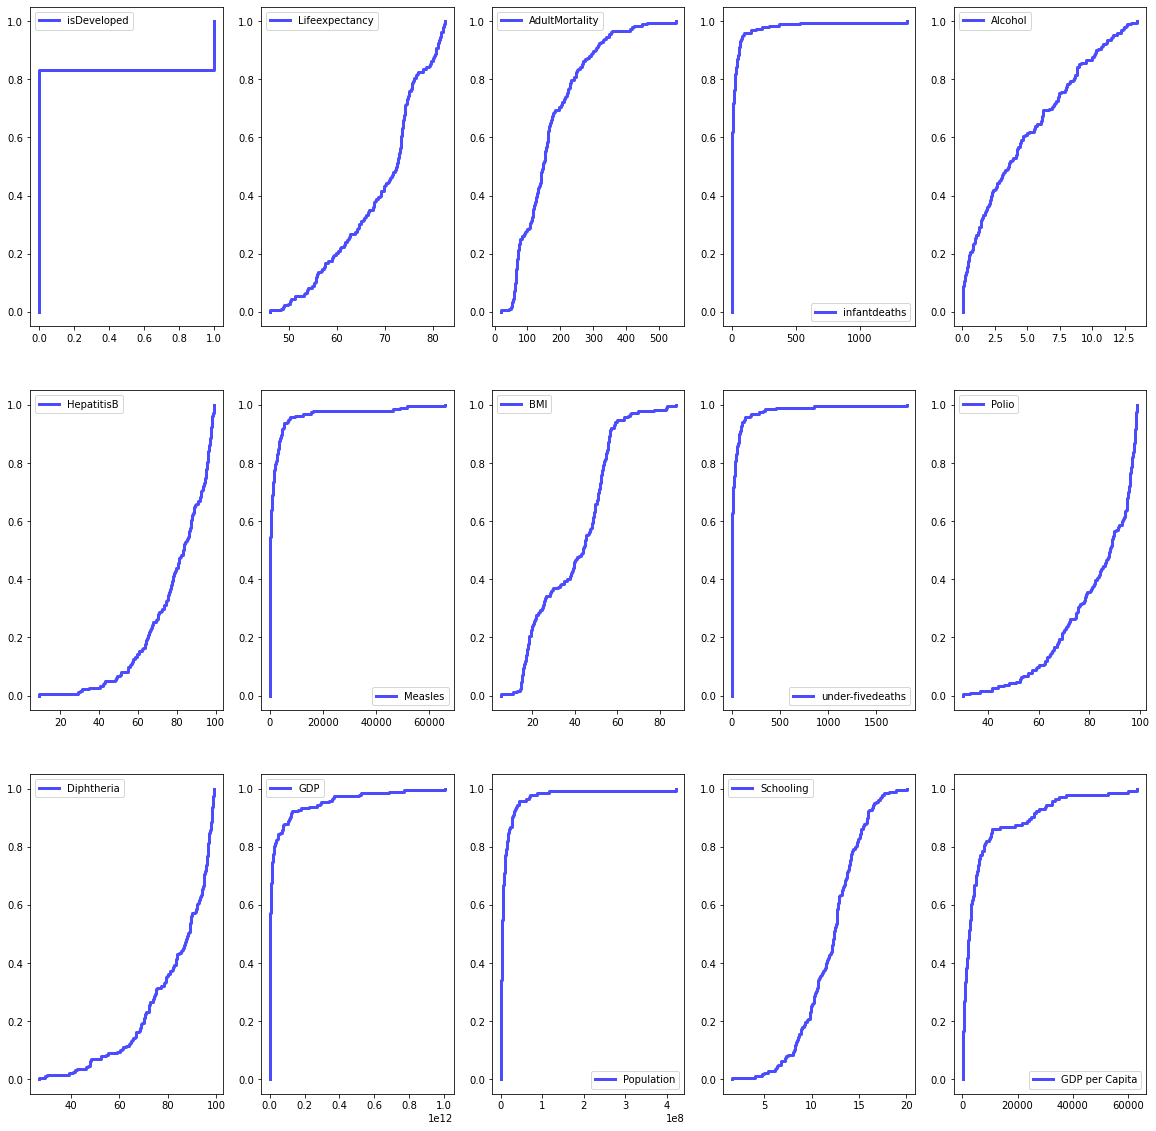

In [5]:
#Part 2: Print all distributions (Cumulative distributions)

#Hide warnings
#thinkplot Cdfs prints a Depreciation Warning for each plot, and takes up alot of space, so the following code is to disable warnings. 
#To re-enable warnings, use the code: warnings.filterwarnings('always')
import warnings
warnings.filterwarnings('ignore')

#Scaling the grid of plots so it is bigger and easier to visualize. 
plt.rcParams["figure.figsize"] = (20,20)

#Using a loop to plot a CDF for each distribution. 
thinkplot.PrePlot(rows=3, cols=5)
for i in column_list:
    thinkplot.SubPlot((column_list.index(i))+1)
    thinkplot.Cdf(thinkstats2.Cdf(dfLE2[i]), color='blue', label=str(i))
    thinkplot.config()


The grid of plots above shows the cumulative distribution of each metric in our data. The distribution of each metric is visualized as a CDF (cumulative density function). There is no distribution plot for the metric 'Country' because it makes no sense to convert each country to a numerical value for the purpose of visualizing a distribution. 

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [6]:
#Scaling the plots back to original size, otherwise singular plots will be too big.  
plt.rcParams["figure.figsize"] = (15,5)

p-value = 0.1240636196013932


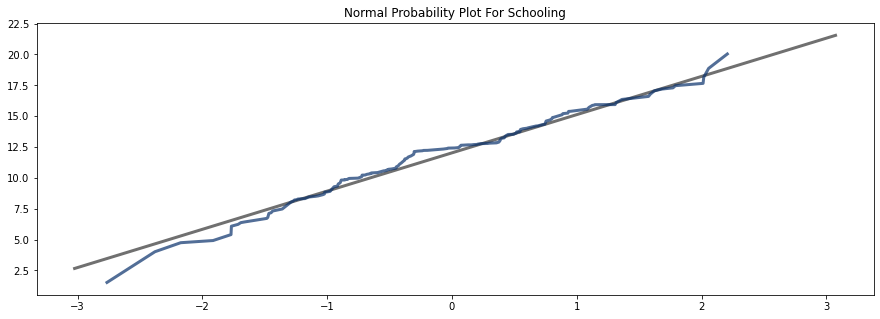

In [7]:
#Analytical for Schooling (Normality Check)

#Create a new dataframe from 'dfLE', called 'schooling', by extracting the 'Schooling' column and dropping rows with NaN values.
#NaN values prevent the fit line on the normal probability plot from showing.
#Also NaN values are useless for out analysis. 
dfschooling = dfLE[['Schooling']].dropna()

#'Schooling' is probably a normal distribution based on the histogram in the previous question. I will check for normality to confirm if it is indeed a normal distribution. 
thinkstats2.NormalProbabilityPlot(dfschooling["Schooling"], fit_color= "0.2")
plt.title("Normal Probability Plot For Schooling", y=1)

#Analytical normality check.
import scipy.stats
k2, p = scipy.stats.normaltest(dfschooling["Schooling"])
print('p-value =', p)



The normal probability plot indicates that 'Schooling' is likely a normal distribution, because the blue line follows closely to the grey line, meaning expected values follows closely with observed values. Alternatively, p-value = 0.124, since p > 0.05, we cannot reject the null hypothesis that 'Schooling' is a normal distribution. 

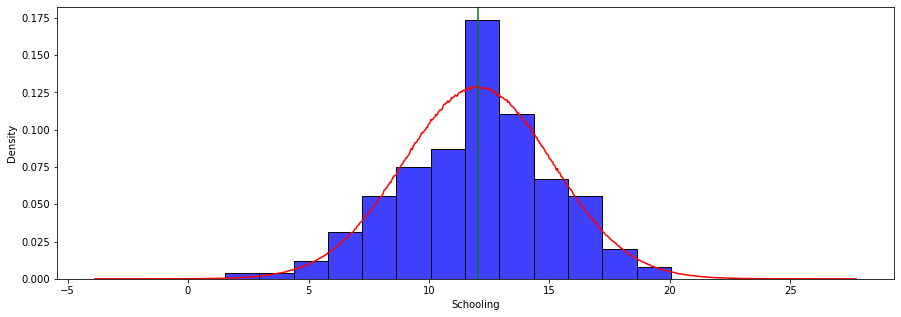

In [8]:
#Analytical for Schooling (Create and visualize distribution)

schoolingmean = dfschooling["Schooling"].mean()
schoolingsigma = dfschooling["Schooling"].std()
normschooling = scipy.stats.norm(schoolingmean, schoolingsigma)

sns.histplot(data=normschooling.rvs(10000000), color="red", stat="density", kde=False, element='poly', fill=False)
sns.histplot(data=dfschooling["Schooling"], color="blue", stat="density")
plt.axvline(schoolingmean, color="green")

The figure above shows the emperical data for 'Schooling' as a histogram in blue. The red line is the normal distribution model created for 'Schooling'. The green line shows the mean the normal distribution model. 

In [9]:
#Analytical for Schooling (Prediction using analytical model)

dfCanada = dfLE[dfLE["Country"] == 'Canada']
print(dfCanada['Schooling'])

#Average schooling for Canada is 15.875 years. Schooling level within 1 year will be 14.875 to 16.875 years. 
schoolingA = normschooling.cdf(16.875)
schoolingB = normschooling.cdf(14.875)
print((schoolingA-schoolingB)*100, '%')


30    15.875
Name: Schooling, dtype: float64
12.032230030119617 %


I can predict that 12.03% of the countries in the world have schooling within 1 year of Canada's, based on my analytical distribution. 

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

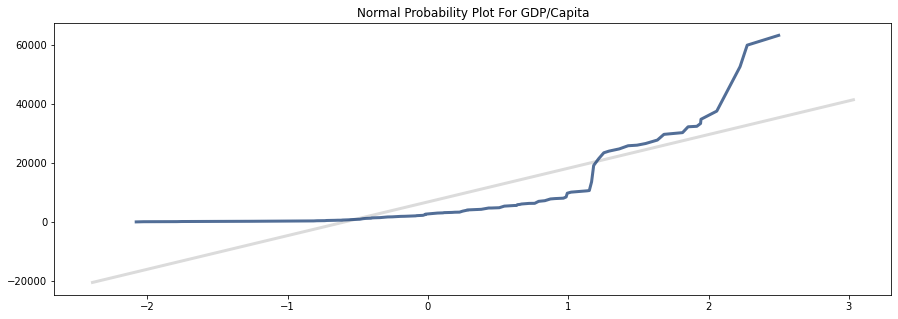

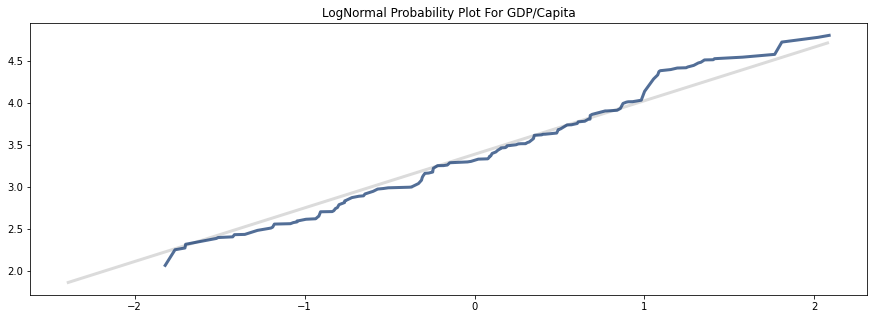

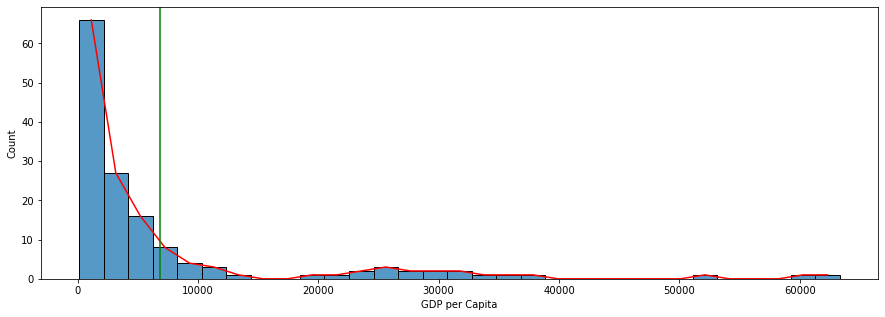

In [10]:
#Analytical for GDP/capita (Normality check and visualization)

#Create dataframe GDP per capita, add a column for GDP per capita divided by 1000 (used to prevent math overflow when using scipy.stats.lognorm function).
dfGDPcapita = dfLE[['GDP per Capita']].dropna()
dfGDPcapita['GDP per Capita divided by 1000'] = dfGDPcapita['GDP per Capita']/1000

#Normality check
pddfGDPcapita = pd.Series(dfGDPcapita['GDP per Capita'])
thinkstats2.NormalProbabilityPlot(pddfGDPcapita)
plt.title("Normal Probability Plot For GDP/Capita", y=1)
plt.show()
thinkstats2.NormalProbabilityPlot(np.log10(pddfGDPcapita))
plt.title("LogNormal Probability Plot For GDP/Capita", y=1)
plt.show()

#Lognormal distribution visualization
extractdf = pd.Series(dfGDPcapita['GDP per Capita divided by 1000'])

mu2 = extractdf.mean()
sigma2 = extractdf.std()

lnGDP = scipy.stats.lognorm(s=sigma2, scale=math.exp(mu2))

sns.histplot(data=pddfGDPcapita, element='poly', fill=False, color='red')
sns.histplot(dfGDPcapita['GDP per Capita'], kde=False)
plt.axvline(dfGDPcapita['GDP per Capita'].mean(), color="green")


The probability plots indicate that the distribution for GDP/Capita is a lognormal distribution. 

The figure above shows the emperical data for 'GDP/Capita' as a histogram in blue. The red line is the lognormal distribution model created for 'GDP/Capita'. The green line shows the mean the lognormal distribution model. 

Text(0.5, 0, 'GDP/Capita of All Countries In 2022')

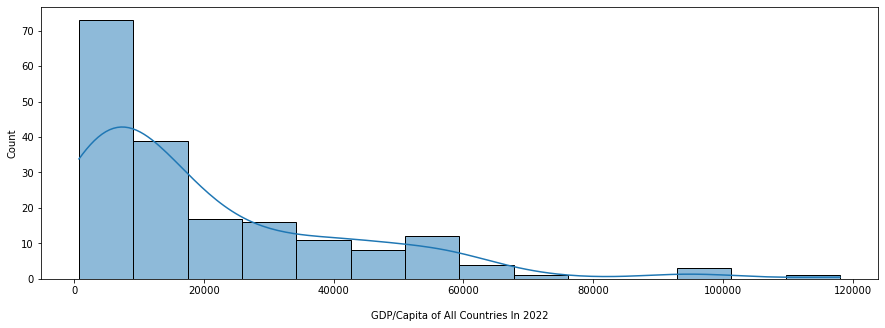

In [11]:
#Analytical for GDP/capita (GDP/Capita Metric Evaluation)

#I downloaded the data for GDP/Capita of all countries in 2022 from: https://worldpopulationreview.com/country-rankings/gdp-per-capita-by-country to compare.

externaldata = pd.read_csv("GDPperCapita.csv")
externaldata.head()

sns.histplot(externaldata["gdppc"], kde=True)
plt.xlabel("GDP/Capita of All Countries In 2022", labelpad=15)


Compared to real GDP/capita of all countries in 2022, which shows also shows a lognormal distribution, I think it's similar to my analytical model, which is also a lognormal distribution. So don't need to drop GDP/capita metric. 

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

The pairplot below shows the correlations between metrics for developed countries, with outliers removed.


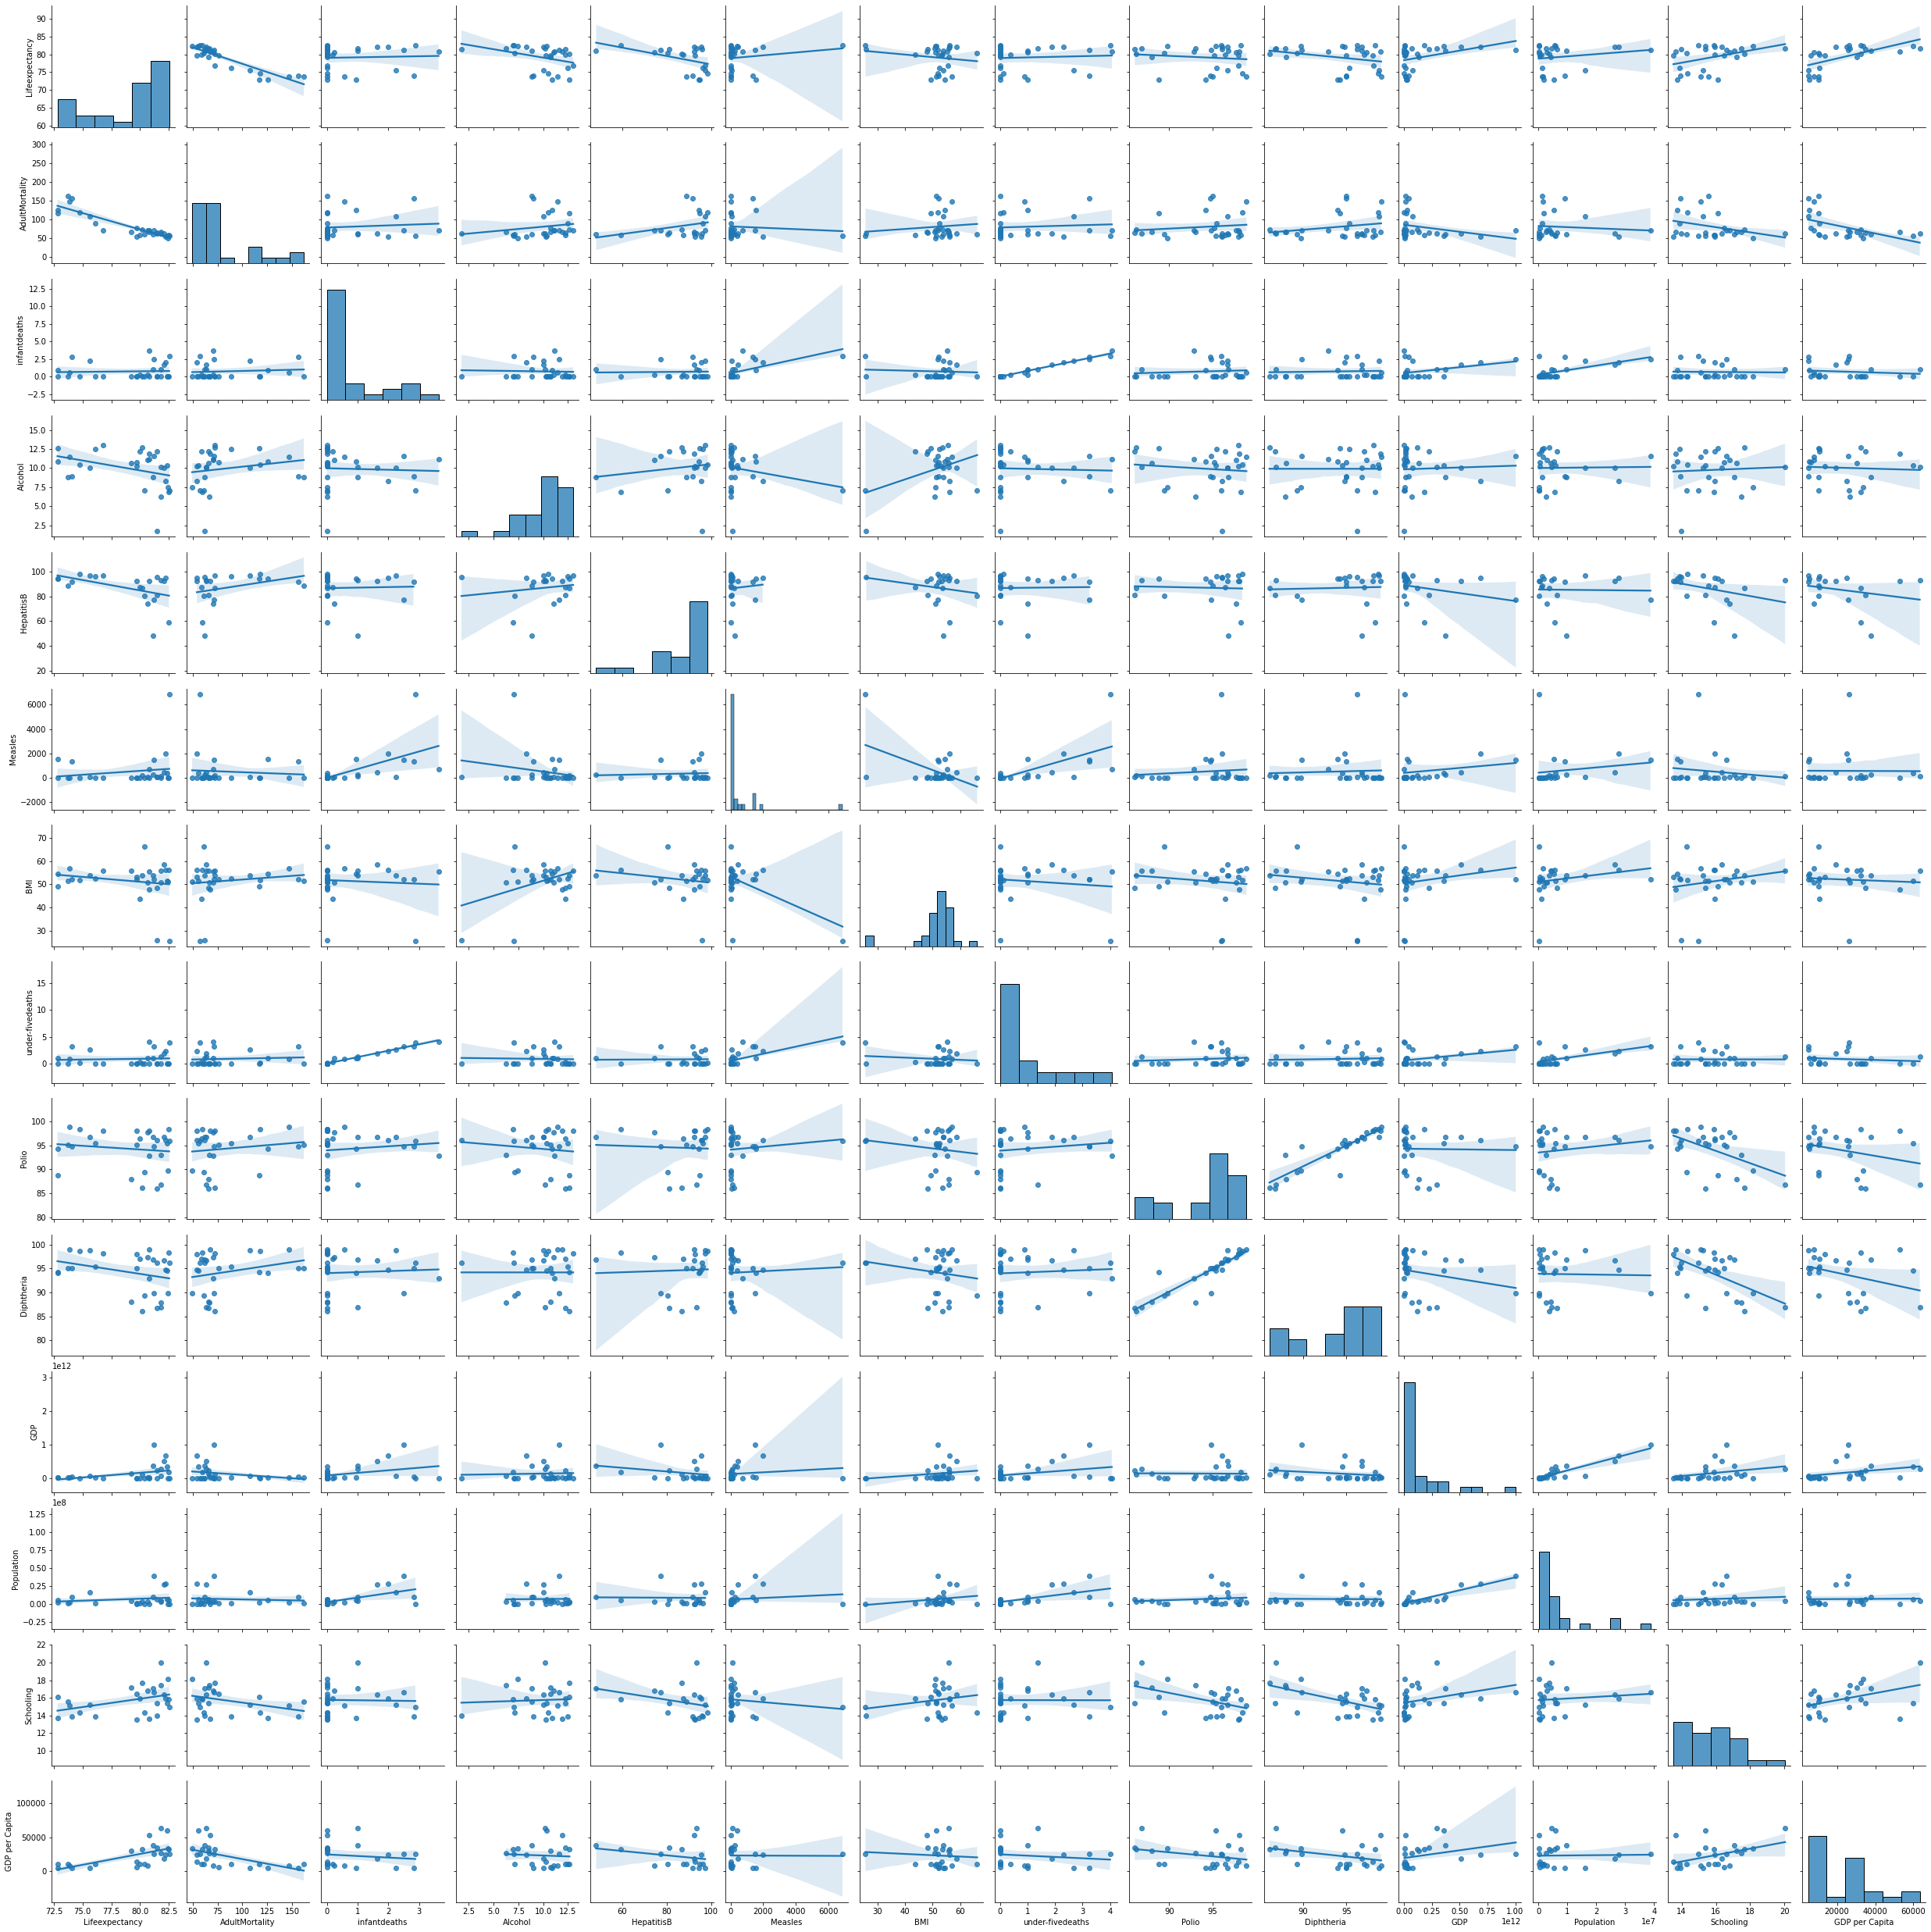



The pairplot below shows the correlations between metrics for developing countries, with outliers removed.


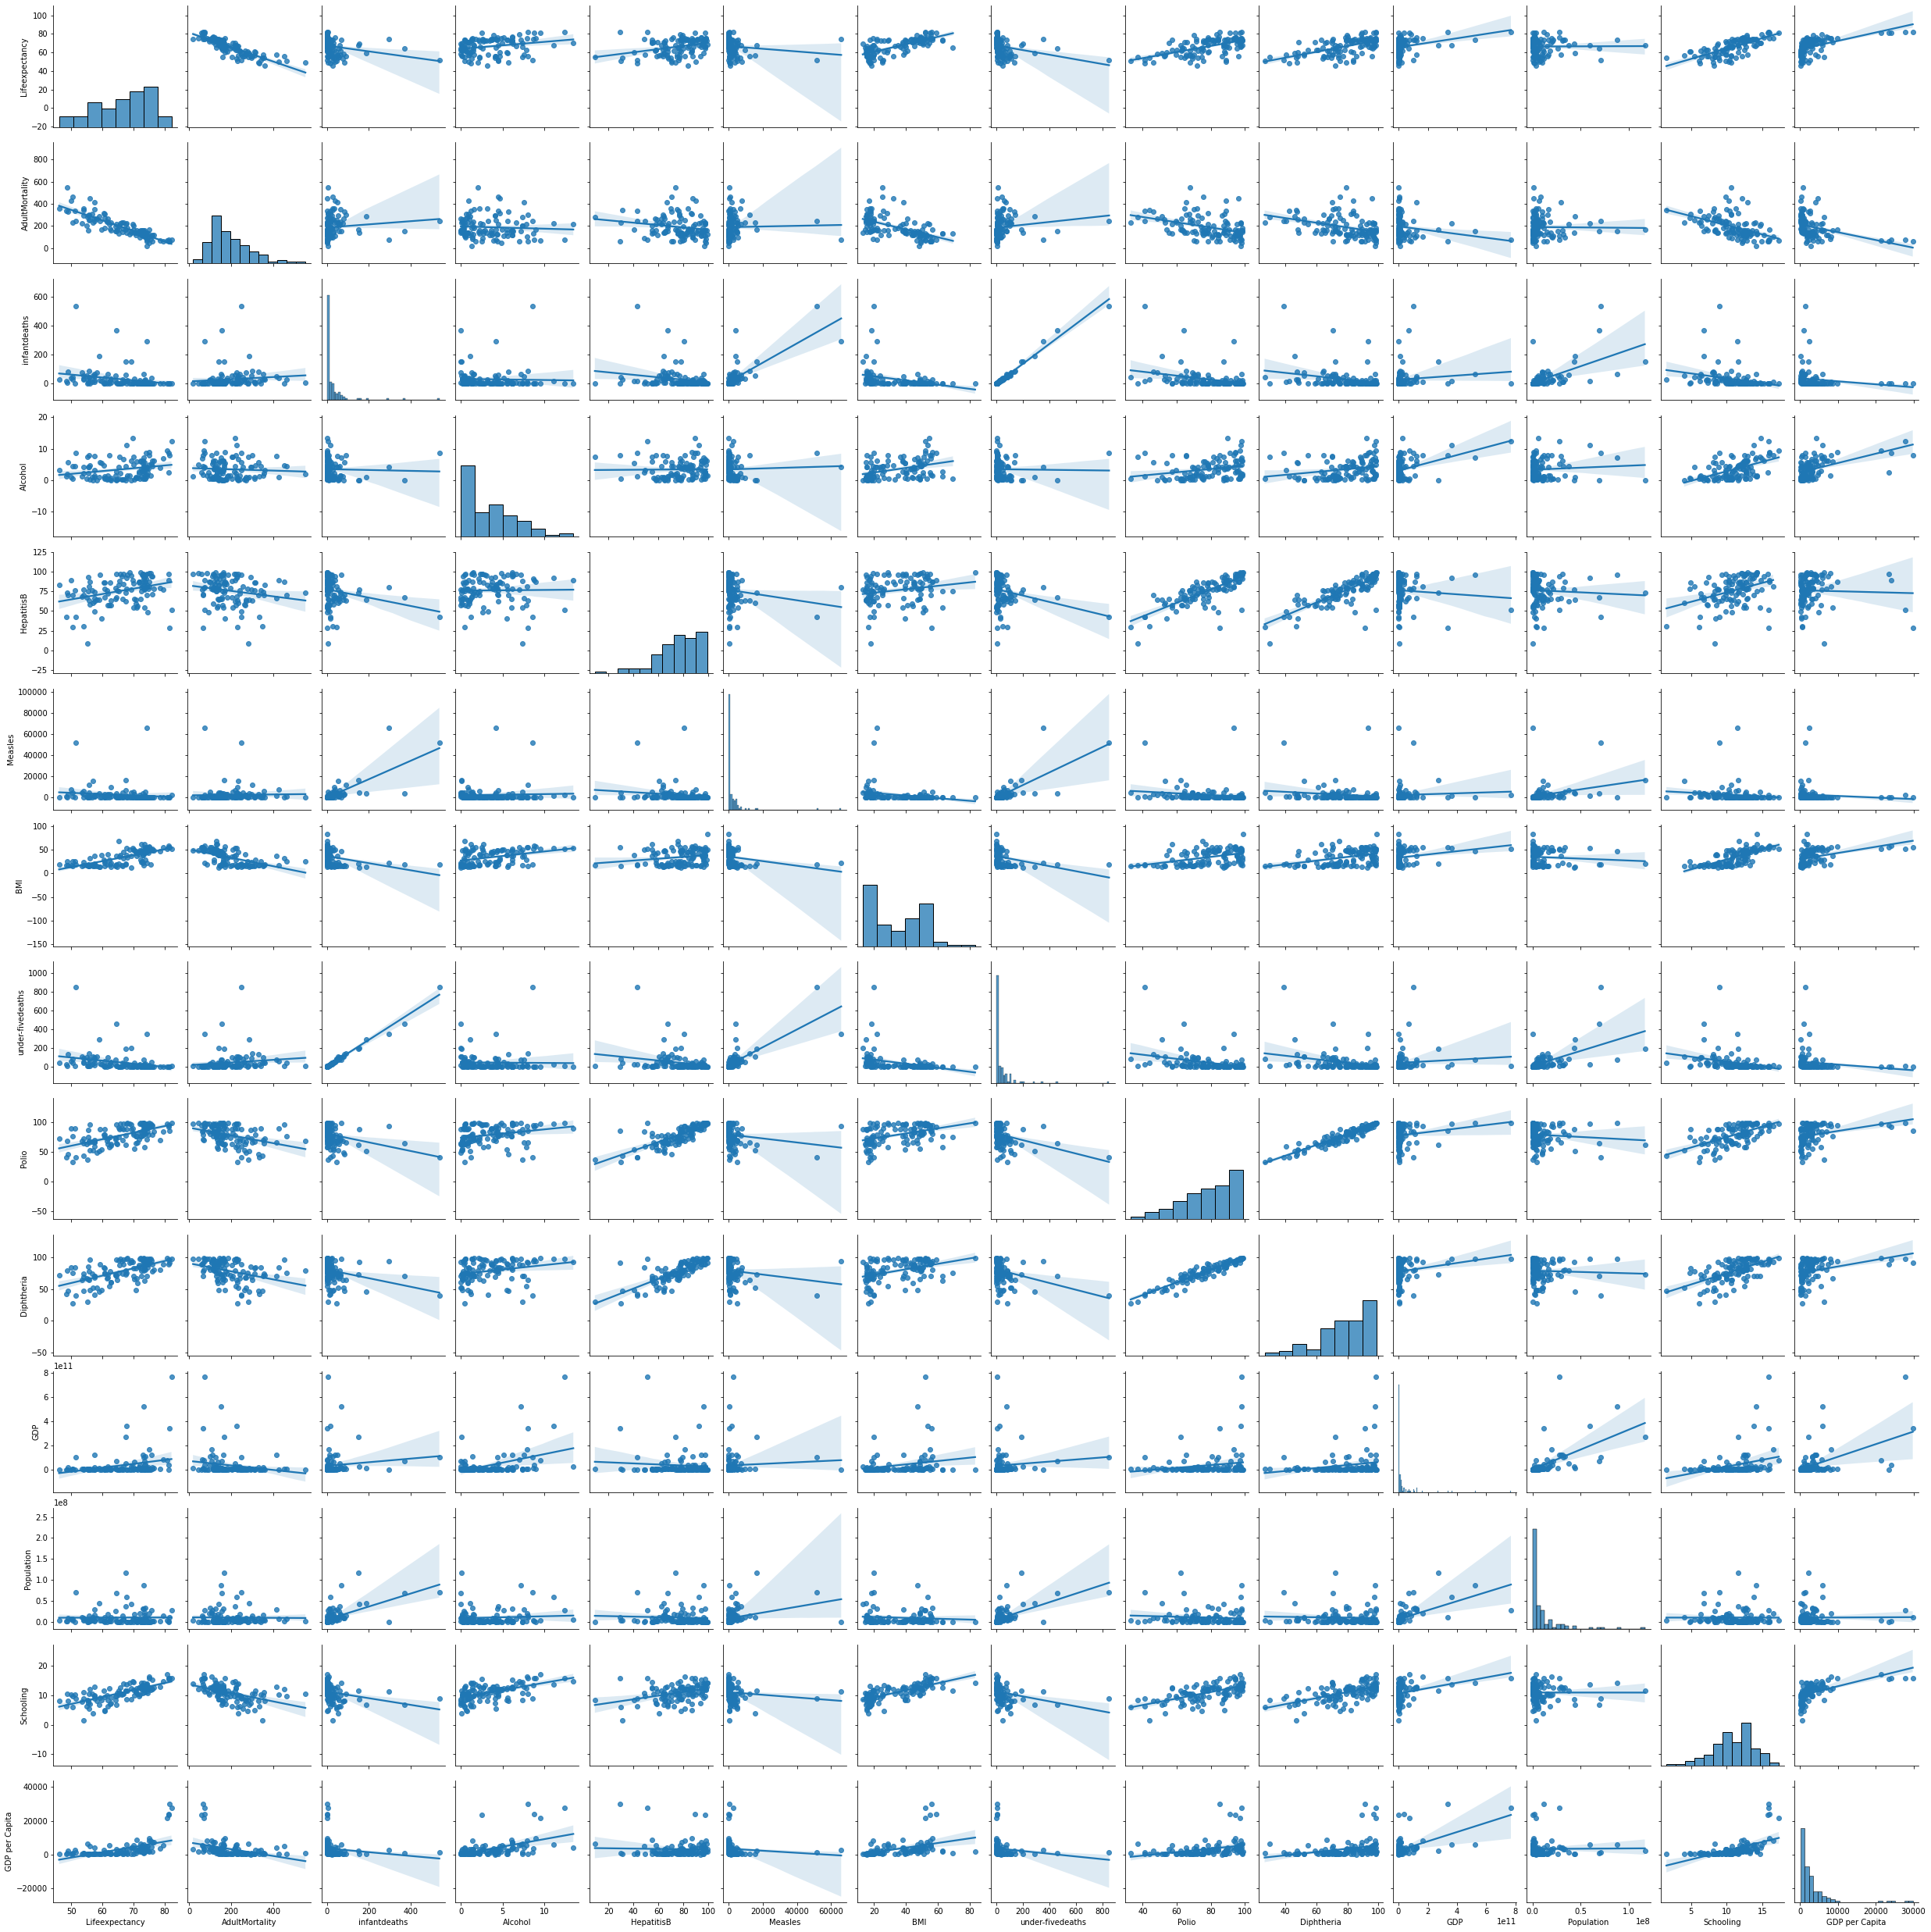

The correlation heatmap below shows the correlations between metrics for developed countries, with outliers removed.


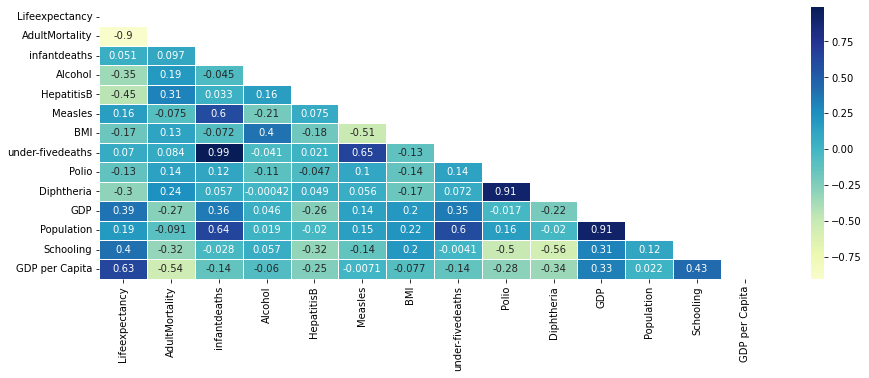



The correlation heatmap below shows the correlations between metrics for developing countries, with outliers removed.


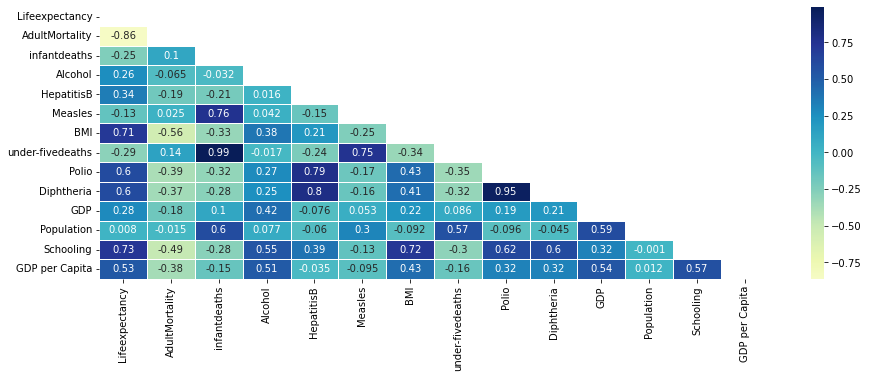

In [12]:
#Visualize correlations. 

#Seperate developed countries and developing countries into 2 dataframes. 
#I will drop the 'Country' column because it cannot be converted to a numerical value. 
#I will also drop 'isDeveloped' column because I've already seperated developed and developing countries into 2 dataframes. 
#Having 'isDeveloped' in my pairplot will just plot a straight line and is useless in determining correlations. 

dfDeveloped = dfLE[dfLE["isDeveloped"] == 1]
dfDeveloped = dfDeveloped.drop(columns=['Country', 'isDeveloped'])

dfDeveloping = dfLE[dfLE["isDeveloped"] == 0]
dfDeveloping = dfDeveloping.drop(columns=['Country', 'isDeveloped'])

#Removing outliers.

dfDeveloped = dfDeveloped[dfDeveloped['infantdeaths']<20] #Most infant deaths for developed countries are ~0, one point that's >20 is an outlier, useless for correlation determination. 
dfDeveloped = dfDeveloped[dfDeveloped['under-fivedeaths']<20] #Most under-fivedeaths for developed countries are ~0, one point that's >20 is an outlier, useless for correlation determination. 
dfDeveloped = dfDeveloped[dfDeveloped['Diphtheria']>80] #Most under-fivedeaths for developed countries are ~90-100, one point that's <80 is an outlier, useless for correlation determination.

dfDeveloping = dfDeveloping[dfDeveloping['infantdeaths']<1000] #Most infant deaths for developing countries are <1000, one point that's >1000 is an outlier, useless for correlation determination. 
dfDeveloping = dfDeveloping[dfDeveloping['under-fivedeaths']<1000] #Most under-fivedeaths for developing countries are <1000, one point that's >1000 is an outlier, useless for correlation determination. 
dfDeveloping = dfDeveloping[dfDeveloping['Population']<200000000] #Most population for developing countries are <200000000, one point that's >200000000 is an outlier, useless for correlation determination. 

#Pairplots for developed and developing countries. 
print('The pairplot below shows the correlations between metrics for developed countries, with outliers removed.')
sns.pairplot(dfDeveloped, dropna=True, kind="reg")
plt.show()

print('\n')

print('The pairplot below shows the correlations between metrics for developing countries, with outliers removed.')
sns.pairplot(dfDeveloping, dropna=True, kind="reg")
plt.show()

#Correlation heatmaps for developed and developing countries.
dfDeveloped = dfDeveloped.corr()
dfDeveloping = dfDeveloping.corr()

print('The correlation heatmap below shows the correlations between metrics for developed countries, with outliers removed.')
mask = np.triu(np.ones_like(dfDeveloped, dtype=bool))
sns.heatmap(dfDeveloped, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()
print('\n')
print('The correlation heatmap below shows the correlations between metrics for developing countries, with outliers removed.')
mask2 = np.triu(np.ones_like(dfDeveloping, dtype=bool))
sns.heatmap(dfDeveloping, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask2)
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [13]:
#Calculate correlations and analyze. (Developed countries)

#For Developed counties, identify and calculate the 3 strongest correlations with life expectancy, using both Pearson and Spearman correlations. 
column_list2 = list(dfDeveloped.columns)
for i in column_list2:
    print(i, ';     Pearson Correlation:', "%.2f" % thinkstats2.Corr(dfDeveloped["Lifeexpectancy"].values.tolist(), dfDeveloped[i].values.tolist()), 
    '     Spearman Correlation:',"%.2f" % thinkstats2.SpearmanCorr(dfDeveloped["Lifeexpectancy"].values.tolist(), dfDeveloped[i].values.tolist()))


Lifeexpectancy ;     Pearson Correlation: 1.00      Spearman Correlation: 1.00
AdultMortality ;     Pearson Correlation: -0.98      Spearman Correlation: -0.99
infantdeaths ;     Pearson Correlation: 0.07      Spearman Correlation: 0.03
Alcohol ;     Pearson Correlation: -0.53      Spearman Correlation: -0.59
HepatitisB ;     Pearson Correlation: -0.72      Spearman Correlation: -0.84
Measles ;     Pearson Correlation: 0.21      Spearman Correlation: 0.36
BMI ;     Pearson Correlation: -0.19      Spearman Correlation: -0.05
under-fivedeaths ;     Pearson Correlation: 0.09      Spearman Correlation: 0.03
Polio ;     Pearson Correlation: -0.37      Spearman Correlation: -0.41
Diphtheria ;     Pearson Correlation: -0.54      Spearman Correlation: -0.69
GDP ;     Pearson Correlation: 0.66      Spearman Correlation: 0.79
Population ;     Pearson Correlation: 0.33      Spearman Correlation: 0.52
Schooling ;     Pearson Correlation: 0.68      Spearman Correlation: 0.76
GDP per Capita ;     Pe

In [14]:
#Calculate correlations and analyze. (Developing countries)

#For Developing counties, identify and calculate the 3 strongest correlations with life expectancy, using both Pearson and Spearman correlations. 
column_list3 = list(dfDeveloping.columns)
for i in column_list3:
    print(i, ';     Pearson Correlation:', "%.2f" % thinkstats2.Corr(dfDeveloping["Lifeexpectancy"].values.tolist(), dfDeveloping[i].values.tolist()), 
    '     Spearman Correlation:',"%.2f" % thinkstats2.SpearmanCorr(dfDeveloping["Lifeexpectancy"].values.tolist(), dfDeveloping[i].values.tolist()))

Lifeexpectancy ;     Pearson Correlation: 1.00      Spearman Correlation: 1.00
AdultMortality ;     Pearson Correlation: -0.97      Spearman Correlation: -0.98
infantdeaths ;     Pearson Correlation: -0.71      Spearman Correlation: -0.87
Alcohol ;     Pearson Correlation: 0.53      Spearman Correlation: 0.64
HepatitisB ;     Pearson Correlation: 0.62      Spearman Correlation: 0.80
Measles ;     Pearson Correlation: -0.63      Spearman Correlation: -0.76
BMI ;     Pearson Correlation: 0.94      Spearman Correlation: 0.95
under-fivedeaths ;     Pearson Correlation: -0.73      Spearman Correlation: -0.86
Polio ;     Pearson Correlation: 0.84      Spearman Correlation: 0.85
Diphtheria ;     Pearson Correlation: 0.84      Spearman Correlation: 0.86
GDP ;     Pearson Correlation: 0.36      Spearman Correlation: 0.40
Population ;     Pearson Correlation: -0.45      Spearman Correlation: -0.54
Schooling ;     Pearson Correlation: 0.95      Spearman Correlation: 0.98
GDP per Capita ;     Pear

**3 Strongest Correlations with Life Expectancy For Both Developed And Developing Countries**

For developed countries, the 3 strongest correlations with life expectancy are: Adult mortality(Pearson Correlation = -0.98, Spearman Correlation = -0.98), GDP/Capita (Pearson Correlation = 0.88, Spearman Correlation = 0.87), and HepatitisB (Pearson Correlation = -0.72, Spearman Correlation = -0.84).

For developing countries, the 3 strongest correlations with life expectancy are: Adult mortality(Pearson Correlation = -0.97, Spearman Correlation = -0.98), Schooling (Pearson Correlation = 0.95, Spearman Correlation = 0.98), and BMI (Pearson Correlation = 0.94, Spearman Correlation = 0.95).

**Analysis of the Strongest Correlations**

1. Life expectancy with adult mortality: In both developed and developing countries, as the rate of adult deaths decrease, the life expectancy increases, this is logical. 
2. Life expectancy with GDP/Capita in developed countries: People who live longer can make more money, thus increasing the GDP they generate, so this makes sense. 
3. Life expectancy with HepatitisB in developed countries: HepatitisB is a virus, so the longer a person lives, the less likely they will have HepatitisB. 
4. Life expectancy with Schooling in developing countries: People in developing countries typically have to compete for resources, so the more schools a country has, the more access to knowledge  and technology people of that country have, allowing them to compete for resources better and therefore live longer. 
5. Life expectancy with BMI in developing countries: Food is typically limited in developing countries, people with better access to food are generally heavier than those who don't. Since food is limited, those with access to it live longer. 

**2 Substantially Different Correlations Between Developed and Developing Countries, With Respect To Life Expectancy**
 
**BMI:**
  
  Life expectancy with BMI in developed countries: Pearson Correlation = -0.19, Spearman Correlation = -0.05
  
  Life expectancy with BMI in developing countries: Pearson Correlation = 0.94, Spearman Correlation = 0.95

  Theory: In developed countries, you can expect to live a long life regardless of your weight because of the good health care systems they have. In developing countries, heavier people (Higher BMI) usually peoples people with better access to food, and are in a better living condition that allows them to live longer lives. So the correlation between BMI and Life Expectancy is weak in developed countries and strong in developing countries. In order to confirm this, furthur research on the correlation between ease of access to food and BMI should be investigated. 


**Under-fivedeaths:**

  Life expectancy with under-fivedeaths in developed countries: Pearson Correlation = 0.09, Spearman Correlation = 0.03
  
  Life expectancy with under-fivedeaths in developing countries: Pearson Correlation = -0.73, Spearman Correlation = -0.86

  Theory: In developed countries, children deaths are rare and typically don't have much of a correlation with overall life expectancy. In developing countries, children deaths are more common and usually due to lack of food or health care, so the less children deaths a country has, the longer you can expect to live, because that means the country has good access to food and healthcare for its population. Furthur research on the correlation between life expectancy and healthcare access can be investigated. 